In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc
import cmath

In [2]:
def matrix(n,diag,upper,lower):
  k=len(diag)
  dia=[]
  for i in range(n):
    for j in range(k):
      dia.append(diag[j])

  #UPPER
  up=[]
  for i in range(n):
    for j in range(k):
      up.append(upper[j])

  up=up[:-1]
  A=np.diag(dia)


  for i in range(int(n*k)-1):
    A[i][i+1]=up[i]
    A[i+1][i]=up[i]

  #N=int(n*k)
  #A[0][0]=A[0][0]+pert[0]
  #A[N-1][N-1]=A[N-1][N-1]+pert[1]

  return(A)

In [3]:
def matrix_fixed_bc(n,diag,upper,lower,pert):
  k=len(diag)
  dia=[]
  for i in range(n):
    for j in range(k):
      dia.append(diag[j])

  #UPPER
  up=[]
  for i in range(n):
    for j in range(k):
      up.append(upper[j])

  up=up[:-1]
  A=np.diag(dia)


  for i in range(int(n*k)-1):
    A[i][i+1]=up[i]
    A[i+1][i]=up[i]

  N=int(n*k)
  A[0][0]=A[0][0]+pert[0]
  A[N-1][N-1]=A[N-1][N-1]+pert[1]

  return(A)

In [4]:
def pert(n,k):
  u=np.random.rand(int(n*k))#vec[0]#[0.1,0,100]
  for i in range(1,int(n*k)-1):
    u[i]=0
  v=u#[0.1,0,100]
  u,v=np.array(u)/(np.linalg.norm(u)),np.array(v)/(np.linalg.norm(v))
  v=v.T

  v=v.reshape(1,int(n*k))
  u=u.reshape(int(n*k),1)

  c=(u @ v)

  return(c,u)

#c=(u @ v.T)

In [5]:
def qgamma(diag_k,u_k,l_k,k):    #to find gamma  and  Qk(z)
  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)
  return(q,gamma1)

In [6]:
def chebeig(diag_k,u_k,l_k,k,t):      
  n=int(k*t)
  q,g=qgamma(diag_k,u_k,l_k,k)
  #print(diag_k)
  q=np.array(q,dtype="complex")
  #print(q,g)
  tnroots=np.zeros(int(n/k),dtype=complex)
  for l in range(1,int(n/k)+1):
    tnroots[l-1]=1j*2*np.cos(np.pi/((n/k)+1)*(l))
  #print(tnroots)
  zcheb = []  #upto this fine
  c0=q[k]
  for i in range(int(n/k)):
    q[k]=c0+((cmath.sqrt(g))*tnroots[i])
    
    zcheb=np.concatenate((zcheb,-np.roots(q)))  
  #print(g)
  #print(np.shape(zcheb))
  return(zcheb)

In [7]:
def thomas(A,d):    
    m,n=np.shape(A)
    a=np.diag(A,-1)
    b=np.diag(A)
    c=np.diag(A,1)
    
    a=np.array(a,dtype='complex')
    b=np.array(b,dtype='complex')
    c=np.array(c,dtype='complex')
    d=np.array(d,dtype='complex')
    x=np.zeros(m,dtype="complex")
    
    #forward propogation
    for i in range(m-1):
        w=a[i]/b[i]
        b[i+1]=b[i+1]-(w*c[i])
        d[i+1]=d[i+1]-(w*d[i])
        
    #back substitution
    
    x[m-1]=d[m-1]/b[m-1]
    
    for i in range(m-2,-1,-1):
        x[i]=(d[i]-(c[i]*x[i+1]))/b[i]
        
    return(x)

In [8]:
7./3-4./3-1

2.220446049250313e-16

In [8]:
def inv_itr(A,muo):
    e_m=7./3-4./3-1  #machine epsion
    m,n=np.shape(A)
    x=np.ones(m)#np.random.rand(m)
    #print(x)
    B=(A-muo*np.identity(m))
    #check diagonal elements of B are zero or not.If it is zero, add some perturbation.
    
    for i in range(m):
        if((B[i][i])==0):
            B[i][i]=B[i][i]+(e_m*10)

    for  i in range(10):
        v=thomas(B,x)
        if((np.linalg.norm(v))==0):
            v=np.array(v)#/(np.linalg.norm(v))  #x is the eigen vector.
        else:
            v=np.array(v)/(np.linalg.norm(v))
            
    muo=np.transpose(v)@A@v   #muo is the eigen value
    return(muo,v)  

In [9]:
def qgamma_n(diag_k,u_k,l_k,k):    #to find gamma  and  Qk(z)
  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)
  return(P1,P2,P3,P4)

In [10]:
k=3
diag=[0,0,0] 
upper=[0,0,1] #np.random.rand(k) #[5,4,1]#-
lower=upper
upper,lower,diag=np.array(upper),np.array(lower),np.array(diag)
#val_cheb=chebeig(diag,upper,lower,k,n)

In [15]:
#for small n
n=2
k=len(diag)
pert=[10,0]
A=matrix(n,diag,upper,lower)
val_cheb=chebeig(diag,upper,lower,k,n)
val_cheb.sort()
val_built,vec_built=np.linalg.eig(A)
val_built.sort()

A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
val_built_fixed.sort()

In [16]:
z=abs(val_cheb-val_built_fixed)

#index which has the highest replacement
ind_0=(np.where(z==max(z))[0])[0]
z[ind_0]=0

#index which has the second highest replacement
ind_1=(np.where(z==max(z))[0])[0]

val_cheb_1=val_cheb[ind_0]

val_cheb_2=val_cheb[ind_1]

val_b_1=val_built_fixed[ind_0]

val_b_2=val_built_fixed[ind_1]

In [17]:
inv_itr(A_fixed_bc,val_b_1)[0]

(10+0j)

In [ ]:
N=[10,20,30,40,50,60,70,80,90,100]
E_b=[]
E_a=[]

for n in N:
  #perform direct replacement for large n


  A=matrix(n,diag,upper,lower)
  val_cheb=chebeig(diag,upper,lower,k,n)
  val_cheb.sort()
  val_built,vec_built=np.linalg.eig(A)
  val_built.sort()

  A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
  val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
  val_built_fixed.sort()

  #error before direct replacement
  avg_abs_e_b=sum(abs(val_cheb-val_built_fixed))
  avg_abs_e_b=avg_abs_e_b/(n*k)
  E_b.append(avg_abs_e_b)


  #direct replacement
  z_0=abs(val_cheb-val_cheb_1)
  ind_rep_0=(np.where(z_0==min(z_0))[0])[0]

  z_1=abs(val_cheb-val_cheb_2)
  ind_rep_1=(np.where(z_1==min(z_1))[0])[0]

  val_cheb[ind_rep_0]=val_b_1
  val_cheb[ind_rep_1]=val_b_2
  val_cheb.sort()

  #error after direct replacement
  avg_abs_e_a=sum(abs(val_cheb-val_built_fixed))
  avg_abs_e_a=avg_abs_e_a/(n*k)
  E_a.append(avg_abs_e_a)

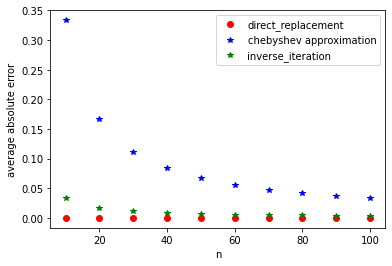

In [ ]:
#graphs
plt.plot(N,E_a,"o",color="red",label="direct_replacement")
plt.plot(N,E_b,"*",color="blue",label="chebyshev approximation")
plt.plot(N,E_i,"*",color="green",label="inverse_iteration")
plt.xlabel("n")
plt.ylabel("average absolute error")
plt.legend()

plt.savefig("inv_itr_d=[0,0,0],l=[0,0,1],u=l,pert=10.png")

Replacement with inverse iteration

In [ ]:
N=[10,20,30,40,50,60,70,80,90,100]
E_i=[]
for n in N:
  #perform direct replacement for large n
  A=matrix(n,diag,upper,lower)
  val_cheb=chebeig(diag,upper,lower,k,n)
  val_cheb.sort()
  val_built,vec_built=np.linalg.eig(A)
  val_built.sort()

  A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
  val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
  val_built_fixed.sort()

  #inverse iteration
  z_0=abs(val_cheb-val_cheb_1)
  ind_rep_0=(np.where(z_0==min(z_0))[0])[0]

  z_1=abs(val_cheb-val_cheb_2)
  ind_rep_1=(np.where(z_1==min(z_1))[0])[0]

  val_cheb[ind_rep_0]=inv_itr(A_fixed_bc,val_b_1)[0]
  #val_cheb[ind_rep_1]=inv_itr(A_fixed_bc,val_b_2)[0]
  val_cheb.sort()

  #error after direct replacement
  avg_abs_e_i=sum(abs(val_cheb-val_built_fixed))
  avg_abs_e_i=avg_abs_e_i/(n*k)
  E_i.append(avg_abs_e_i)

In [ ]:
val_b_s

32.282841076244395

In [ ]:
inv_itr(A_fixed_bc,val_b_s)[0]

(32.28284106903057+0j)

In [12]:
A_bar,B,C,D=qgamma_n(diag,upper,lower,k)

In [11]:
k=len(diag)

pert=[0.1,0]
n=20
A=matrix(n,diag,upper,lower)
val_cheb=chebeig(diag,upper,lower,k,n)
val_cheb.sort()
val_built,vec_built=np.linalg.eig(A)
val_built.sort()

A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
val_built_fixed.sort()

#val_built_fixed=val_built_fixed[:-2]

In [12]:
A_bar,B,C,D=qgamma_n(diag,upper,lower,k)

In [13]:
def S(A,B,C,D,val_e,a,a1):
  n=len(val_e)
  S_val=[]
  R_val=[]
  for i in range(n):
    A_val=np.polyval(A,val_e[i])
    B_val=np.polyval(B,val_e[i])
    C_val=np.polyval(C,val_e[i])
    D_val=np.polyval(D,val_e[i])
    dif_a=a-a1
    #print(dif_a)
    #print(val_cheb[i])
    #print(A_val)
    R=1-(dif_a*D_val/B_val)
    R_val.append(R)
    S_bar=(A_val+C_val*dif_a)/R
    S_v=S_bar-A_val
    S_val.append(S_v)
  return(R_val,S_val)

In [14]:
# Simple Python3 program to multiply two polynomials
def multiply(A, B, m, n):

	prod = [0] * (m + n - 1);
	
	# Multiply two polynomials term by term
	
	# Take ever term of first polynomial
	for i in range(m):
		
		# Multiply the current term of first
		# polynomial with every term of
		# second polynomial.
		for j in range(n):
			prod[i + j] += A[i] * B[j];

	return prod



# polynomial 5 + 10x^2 + 6x^3
A = [5, 0, 10, 6];

# The following array represents
# polynomial 1 + 2x + 4x^2
B = [1, 2, 4];
m = len(A);
n = len(B);

prod = multiply(A, B, m, n);


In [15]:
# Simple Python 3 program to add two polynomials

def add(A, B, m, n):

	size = max(m, n);
	sum = [0 for i in range(size)]

	# Initialize the product polynomial
	
	for i in range(0, m, 1):
		sum[i] = A[i]

	# Take ever term of first polynomial
	for i in range(n):
		sum[i] += B[i]

	return sum


# polynomial 5 + 10x^2 + 6x^3
A = [5, 0, 10, 6]

# The following array represents
# polynomial 1 + 2x + 4x^2
B = [1, 2, 4]
m = len(A)
n = len(B)

sum = add(A, B, m, n)


In [16]:
#to solve the 2k points
def solve_2k(diag,upper,lower,k):
  q,gamma=qgamma(diag,upper,lower,k)
  p_1=[1,diag[k-1]]
  q,p_1=np.array(q),np.array(p_1)
  p=add(p_1,-q,len(p_1),len(q))
  p=p[::-1]
  m=len(p)
  n=len(q)
  eqn_1=multiply(p[::-1],q[::-1],m,n)
  eqn_2=multiply(p[::-1],p[::-1],m,m)
  eqn_3=add(eqn_1,eqn_2,len(eqn_1),len(eqn_2))
  eqn_3=eqn_3[::-1]

  eqn_3[-1]=eqn_3[-1]-gamma

  sln=np.roots(eqn_3)
  return(sln)

In [17]:
sln=solve_2k(diag,upper,lower,k)

In [18]:
A_bar,B,C,D=qgamma_n(diag,upper,lower,k)
R_sln,S_sln=S(A_bar,B,C,D,sln,pert[0]+diag[0],diag[0])
R_sln=np.array(R_sln)
S_sln=np.array(S_sln)
mod_S_sln=abs(S_sln)

<ipython-input-13-1d5507b97cbc>:14: RuntimeWarning: invalid value encountered in double_scalars
  R=1-(dif_a*D_val/B_val)


In [ ]:
sln

array([-1.        +0.j        ,  0.61379324+0.08999861j,
        0.61379324-0.08999861j, -0.32480871+0.j        ])

In [ ]:
mod_S_sln

array([1.        , 0.04643519, 0.04643519, 0.01897423])

In [ ]:
mod_s_ind=np.where(min(abs(S_val-(mod_S_sln[0]))))

NameError: ignored

In [ ]:
mod_s_ind

(array([8]),)

In [ ]:
#find val_built which is close to sln
t=len(sln)
sln_built=[]
for i in range(t):
  h=min(abs(val_built-sln[i]))
  s=np.where((abs(val_built-sln[i]))==h)
  sln_built.append(val_built[s][0])

In [ ]:
sln_built

[-0.9838618502633815,
 0.9999999999999956,
 0.9999999999999956,
 -0.5644804312128501]

#S_VAL

In [43]:
k=2
diag=[1,2] 
upper=[1,-3] 
lower=upper
upper,lower,diag=np.array(upper),np.array(lower),np.array(diag)
pert=[10,0]
n=20
#val_cheb=chebeig(diag,upper,lower,k,n)

In [44]:
k=len(diag)


n=20
A=matrix(n,diag,upper,lower)
val_cheb=chebeig(diag,upper,lower,k,n)
val_cheb.sort()
val_built,vec_built=np.linalg.eig(A)
val_built.sort()

A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
val_built_fixed,vec_built_fixed=np.linalg.eig(A_fixed_bc)
val_built_fixed.sort()

#val_built_fixed=val_built_fixed[:-2]

In [45]:
A_bar,B,C,D=qgamma_n(diag,upper,lower,k)

In [46]:
R_val,S_val=S(A_bar,B,C,D,val_cheb,pert[0]+diag[0],diag[0])
R_val=np.array(R_val)
S_val=np.array(S_val)

In [47]:
mod_s_val=abs(S_val)
#mod_s_val.sort()a

In [100]:
mod_S_sln[0]

7.292228584632661

In [41]:
#mod_s_val[10]

In [101]:
mod_s_ind=np.where(min(abs(mod_s_val-(mod_S_sln[3])))==(abs(mod_s_val-(mod_S_sln[3]))))

In [102]:
mod_s_ind

(array([], dtype=int64),)

In [46]:
#val_built_fixed[15]

In [48]:
mod_s_val.sort()

In [91]:
mod_s_val[0]

0.007922754180636815

In [25]:
def dl_c(S_val,val_built_fixed):
  n=len(S_val)
  #forward
  #ds_2_f=[]
  dl_2_f=[]

  for i in range(n-1):
    #ds_2_f.append((S_val[i]-S_val[i+1])**2)
    dl_2_f.append((val_built_fixed[i]-val_built_fixed[i+1])**2)
  #ds_2_f.append(0)
  dl_2_f.append(0)

  #ds_2_f=np.array(ds_2_f)
  dl_2_f=np.array(dl_2_f)
  ds_dl_f=(dl_2_f)

  #backward
  #ds_2_b=[0]
  dl_2_b=[0]

  for i in range(1,n):
    #ds_2_b.append((S_val[i]-S_val[i-1])**2)
    dl_2_b.append((val_built_fixed[i]-val_built_fixed[i-1])**2)

  #ds_2_b=np.array(ds_2_b)
  dl_2_b=np.array(dl_2_b)
  ds_dl_b=(dl_2_b)
  #print(ds_dl_b)
  #finding minimum of forward and backward
  ds_dl=[ds_dl_f[0]]
  for i in range(1,n-1):
    ds_dl.append(min(ds_dl_f[i],ds_dl_b[i]))
  ds_dl.append(ds_dl_b[-1])
  ds_dl=np.array(ds_dl)

  return(ds_dl)

In [26]:
def ds_dl_c(S_val,val_built_fixed):
  n=len(S_val)
  #forward
  ds_2_f=[]
  dl_2_f=[]
  #dl=[]

  for i in range(n-1):
    ds_2_f.append((S_val[i]-S_val[i+1])**2)
    dl_2_f.append((val_built_fixed[i]-val_built_fixed[i+1])**2)
  ds_2_f.append(0)
  dl_2_f.append(0)

  ds_2_f=np.array(ds_2_f)
  dl_2_f=np.array(dl_2_f)
  ds_dl_f=(ds_2_f+dl_2_f)

  #backward
  ds_2_b=[0]
  dl_2_b=[0]

  for i in range(1,n):
    ds_2_b.append((S_val[i]-S_val[i-1])**2)
    dl_2_b.append((val_built_fixed[i]-val_built_fixed[i-1])**2)

  ds_2_b=np.array(ds_2_b)
  dl_2_b=np.array(dl_2_b)
  ds_dl_b=(ds_2_b+dl_2_b)
  
  #print(ds_dl_b)
  #finding minimum of forward and backward
  ds_dl=[ds_dl_f[0]]
  #dl=[dl_2_b[0]]
  for i in range(1,n-1):
    ds_dl.append(min(ds_dl_f[i],ds_dl_b[i]))
    #dl.append(min(dl_2_b[i],dl_2_f[i]))
  ds_dl.append(ds_dl_b[-1])
  #dl.append(dl_2_b[-1])
  ds_dl=np.array(ds_dl)
  #dl=np.array(dl)

  return(ds_dl)

In [49]:
dl=ds_dl_c(abs(S_val),val_built_fixed)

In [50]:
pert

[10, 0]

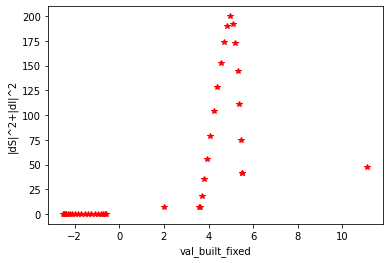

In [51]:
#@title Default title text
plt.plot(val_built_fixed,dl,"*",color="red")
#plt.plot(sln_built,mod_S_sln,"*",color="blue") #has pblm
plt.xlabel("val_built_fixed")
plt.ylabel("|dS|^2+|dl|^2")
plt.savefig("ds_dl_[1,2],l=u,u=[1,-3]pert=[10,0]_n=20.png")

Text(0, 0.5, '|S|')

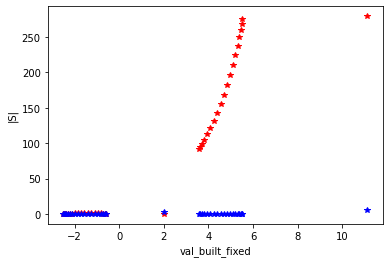

In [ ]:
#plt.plot(val_built,Z,"*",color="black")
plt.plot(val_built_fixed,abs(S_val),"*",color="red")
Z=abs(val_cheb-val_built_fixed)
#plt.xlabel("val_built_fixed")
#plt.ylabel("|val_built_fixed-val_cheb|")
plt.plot(val_built_fixed,Z,"*",color="blue")
plt.xlabel("val_built_fixed")
plt.ylabel("|S|")
#plt.savefig("S diagram_d=[1,2,0],l=-u,u=[1,2,4]pert=[-0.1,0]_n=20.png")

In [ ]:
pert

[1, 0]

Text(0, 0.5, '|S|')

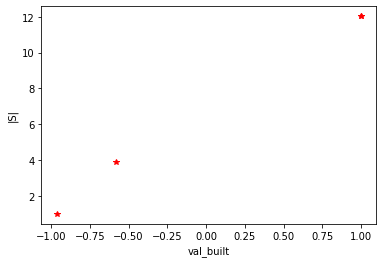

In [ ]:
#@title Default title text
plt.plot(sln_built,mod_S_sln,"*",color="red")
plt.xlabel("val_built")
plt.ylabel("|S|")
#plt.savefig("2k_S diagram_d=[1,2],l=u,u=[1,-3]pert=[-0.1,0]_n=20.png")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


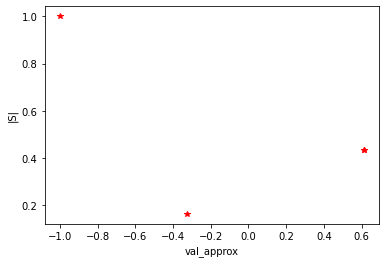

In [ ]:
plt.plot(sln,mod_S_sln,"*",color="red")
plt.xlabel("val_approx")
plt.ylabel("|S|")
plt.savefig("2k_approx_S diagram_d=[1,2],l=u,u=[1,-3]pert=[-0.1,0]_n=20.png")

Text(0, 0.5, '|S|')

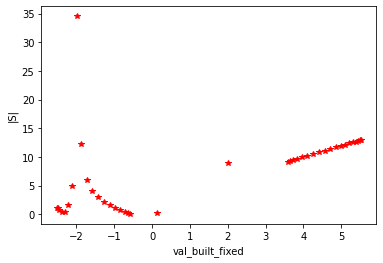

In [ ]:
#plt.plot(val_built,Z,"*",color="black")
plt.plot(val_built_fixed,abs(S_val),"*",color="red")
#plt.plot(sln_built,mod_S_sln,"*",color="blue") #has pblm
plt.xlabel("val_built_fixed")
plt.ylabel("|S|")
#plt.savefig("S diagram_d=[1,2,0],l=-u,u=[1,2,4]pert=[-0.1,0]_n=20.png")

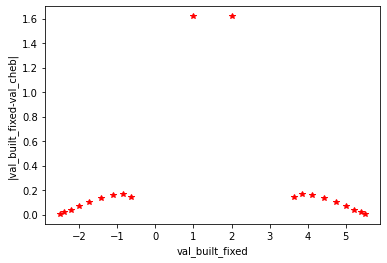

In [ ]:
Z=abs(val_cheb-val_built_fixed)
plt.xlabel("val_built_fixed")
plt.ylabel("|val_built_fixed-val_cheb|")
plt.plot(val_built_fixed,Z,"*",color="red")
#plt.savefig("difference_d=[1,2,0],l=-u,u=[1,2,4]pert=[0,10]_n=20.png")